In [37]:
#importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import nltk
import string
import math
import re
%matplotlib inline
warnings.filterwarnings("ignore")
import re
import random
import pandas as pd
import urllib.request
import textwrap
from nltk.corpus import stopwords
from collections import Counter
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import adjusted_rand_score, cohen_kappa_score, silhouette_score
from gensim.models import Word2Vec
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [38]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("Movies dataset_v1.1.csv")

In [39]:
df1.head()

,movieId,title,genres,movie_name,Plot,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,A little boy named Andy loves to be in his roo...,1,4.0
1,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,Things don't seem to change much in Wabasha Co...,1,4.0
2,6,Heat (1995),Action|Crime|Thriller,Heat,Hunters and their prey--Neil and his professio...,1,4.0
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,Seven,"A veteran samurai, who has fallen on hard time...",1,5.0
4,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,From Dusk Till Dawn,After a bank heist in Abilene with several cas...,1,3.0


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83447 entries, 0 to 83446
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movieId     83447 non-null  int64  
 1   title       83447 non-null  object 
 2   genres      83447 non-null  object 
 3   movie_name  83447 non-null  object 
 4   Plot        83447 non-null  object 
 5   userId      83447 non-null  int64  
 6   rating      83447 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 4.5+ MB


In [41]:
df1.drop_duplicates(subset=["movie_name"], keep="first", inplace=True)

In [42]:
df1['genre'] = df1['genres'].str.split('|')

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7570 entries, 0 to 83440
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movieId     7570 non-null   int64  
 1   title       7570 non-null   object 
 2   genres      7570 non-null   object 
 3   movie_name  7570 non-null   object 
 4   Plot        7570 non-null   object 
 5   userId      7570 non-null   int64  
 6   rating      7570 non-null   float64
 7   genre       7570 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 532.3+ KB


In [44]:
df= df1.loc[:, ["movie_name", "genre", "Plot"]]


In [45]:
df.head(20)

,movie_name,genre,Plot
0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",A little boy named Andy loves to be in his roo...
1,Grumpier Old Men,"[Comedy, Romance]",Things don't seem to change much in Wabasha Co...
2,Heat,"[Action, Crime, Thriller]",Hunters and their prey--Neil and his professio...
3,Seven,"[Mystery, Thriller]","A veteran samurai, who has fallen on hard time..."
4,From Dusk Till Dawn,"[Action, Comedy, Horror, Thriller]",After a bank heist in Abilene with several cas...
5,Bottle Rocket,"[Adventure, Comedy, Crime, Romance]",Upon his release from a mental hospital follow...
6,Braveheart,"[Action, Drama, War]",William Wallace is a Scottish rebel who leads ...
7,Rob Roy,"[Action, Drama, Romance, War]","In the highlands of Scotland in the 1700s, Rob..."
8,Canadian Bacon,"[Comedy, War]","The US economy is in a rut, and so is the pres..."
9,Desperado,"[Action, Romance, Western]",Director Robert Rodriguez picks up where his s...


In [46]:
from sklearn.preprocessing import MultiLabelBinarizer
import re
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['genre'])

# transform target variable
y = multilabel_binarizer.transform(df['genre'])

In [47]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [48]:
df['clean_plot'] = df['Plot'].apply(lambda x: clean_text(x))

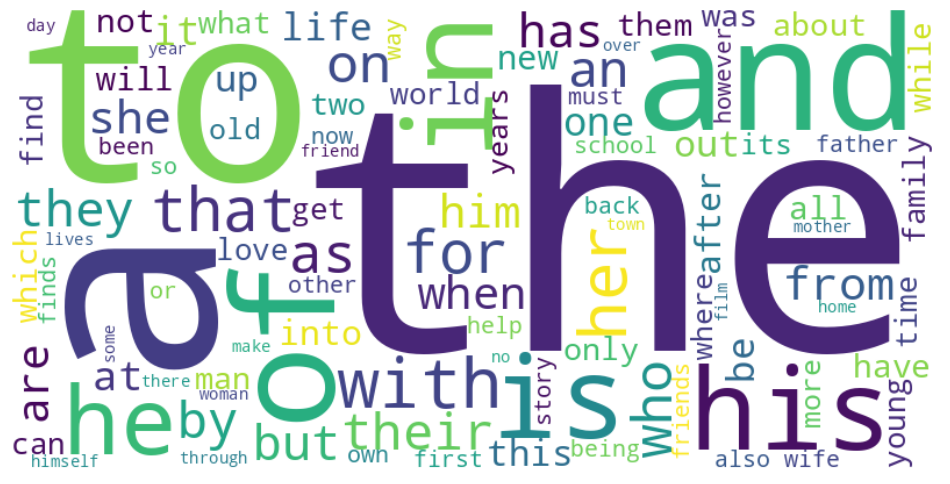

In [49]:
from wordcloud import WordCloud

def freq_words(x, terms = 10):
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 

    # selecting top n most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 

    # create a dictionary with words and their frequencies
    word_freq = {}
    for i in range(len(d)):
        word_freq[d.iloc[i]['word']] = d.iloc[i]['count']

    # create a word cloud object
    wc = WordCloud(background_color='white', width=800, height=400)
    
    # generate the word cloud
    wc.generate_from_frequencies(word_freq)

    # plot the word cloud
    plt.figure(figsize=(12,15)) 
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# generate a word cloud from the 100 most frequent words
freq_words(df['clean_plot'], 100)


In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df['clean_plot'] = df['clean_plot'].apply(lambda x: remove_stopwords(x))

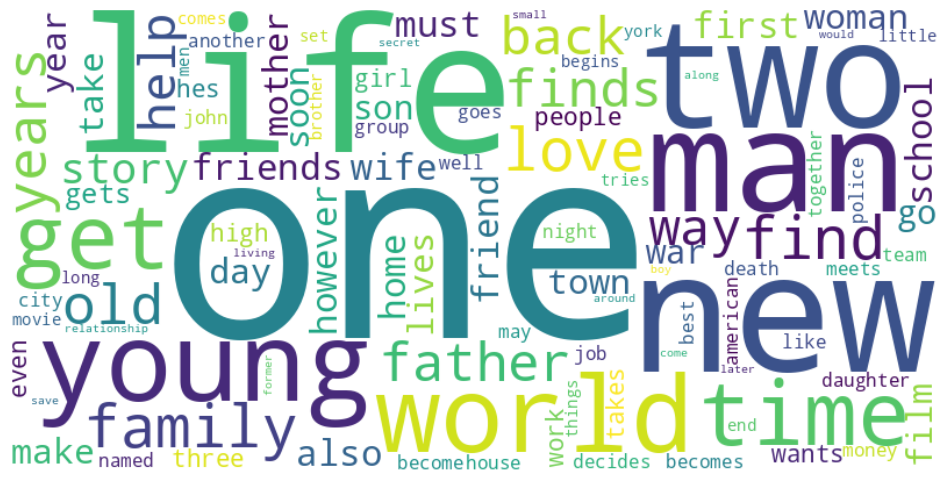

In [52]:
freq_words(df['clean_plot'], 100)

In [53]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [54]:
vectorizer = CountVectorizer()

In [55]:
# split dataset into training and validation set
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(df['clean_plot'], y, test_size=0.2, random_state=9)

In [56]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [57]:
xtrain_bow = vectorizer.fit_transform(xtrain)
xval_bow = vectorizer.transform(xval)

In [58]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [59]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
# fit model on train data
clf.fit(xtrain_bow, ytrain)
# make predictions for validation set
y_pred = clf.predict(xval_bow)
LRSCORE_BOW=f1_score(yval, y_pred, average="micro")
print(LRSCORE_BOW)

0.48722016569716203


In [60]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [61]:
LRSCORE=f1_score(yval, y_pred, average="micro")
print(LRSCORE)

0.3539166484835261


ERROR ANALYSIS AND IMPROVING PERFORMANCE

In [62]:
y_pred_prob = clf.predict_proba(xval_tfidf)

t = 0.4 # threshold value - if value is more than 0.4 it changes to 1
y_pred_new = (y_pred_prob >= t).astype(int)

# evaluate performance
LRSCORE_IMPROVED = f1_score(yval, y_pred_new, average="micro")
print(LRSCORE_IMPROVED)

0.4650054965188713


In [63]:
# def infer_tags(q):
#     q = clean_text(q)
#     q = remove_stopwords(q)
#     q_vec = tfidf_vectorizer.transform([q])
#     q_pred = clf.predict(q_vec)
#     return multilabel_binarizer.inverse_transform(q_pred)


In [64]:
# for i in range(5): 
#   k = xval.sample(1).index[0] 
#   print("Movie: ", df['movie_name'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",df['genre'][k], "\n")

In [65]:
from sklearn.metrics import classification_report
cr=classification_report(yval, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.70      0.19      0.30       298
           2       0.73      0.06      0.10       199
           3       0.00      0.00      0.00        92
           4       0.00      0.00      0.00        79
           5       0.68      0.47      0.56       589
           6       0.67      0.05      0.10       194
           7       0.00      0.00      0.00        71
           8       0.75      0.54      0.63       707
           9       0.00      0.00      0.00       117
          10       0.00      0.00      0.00        13
          11       0.83      0.04      0.07       141
          12       0.00      0.00      0.00        32
          13       0.00      0.00      0.00        49
          14       0.00      0.00      0.00        94
          15       0.88      0.09      0.16       253
          16       0.92      0.14      0.24       162
          17       0.75    

Precision is the ratio of true positives to the total predicted positives.

Recall is the ratio of true positives to the total actual positives.

F1 score is the harmonic mean of precision and recall

In [66]:
from sklearn.tree import DecisionTreeClassifier
c = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf = OneVsRestClassifier(c)
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [67]:
DTCSCORE=f1_score(yval, y_pred, average="micro")
print(DTCSCORE)

0.38027952695438483


ERROR ANALYSIS AND IMPROVING PERFORMANCE FOR DECISION TREE

In [68]:
y_pred_prob = clf.predict_proba(xval_tfidf)

t = 0.4 # threshold value - if value is more than 0.4 it changes to 1
y_pred_new = (y_pred_prob >= t).astype(int)

# evaluate performance
DTCSCORE_IMPROVED = f1_score(yval, y_pred_new, average="micro")
print(DTCSCORE_IMPROVED)

0.3811569740678227


In [69]:
c = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf = OneVsRestClassifier(c)
clf.fit(xtrain_bow, ytrain)
# make predictions for validation set
y_pred = clf.predict(xval_bow)
DTCSCORE_BOW=f1_score(yval, y_pred, average="micro")
print(DTCSCORE_BOW)

0.38907103825136613


In [70]:
from sklearn.svm import SVC
s= SVC(kernel='linear', random_state=0)
clf = OneVsRestClassifier(s)
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)
SVMSCORE=f1_score(yval, y_pred, average="micro")
print(SVMSCORE)

0.4610616040294459


In [71]:
s= SVC(kernel='linear', random_state=0)
clf = OneVsRestClassifier(s)
# fit model on train data
clf.fit(xtrain_bow, ytrain)
# make predictions for validation set
y_pred = clf.predict(xval_bow)
SVMSCORE_BOW=f1_score(yval, y_pred, average="micro")
print(SVMSCORE_BOW)

0.48686514886164617


VISUALIZING RESULTS

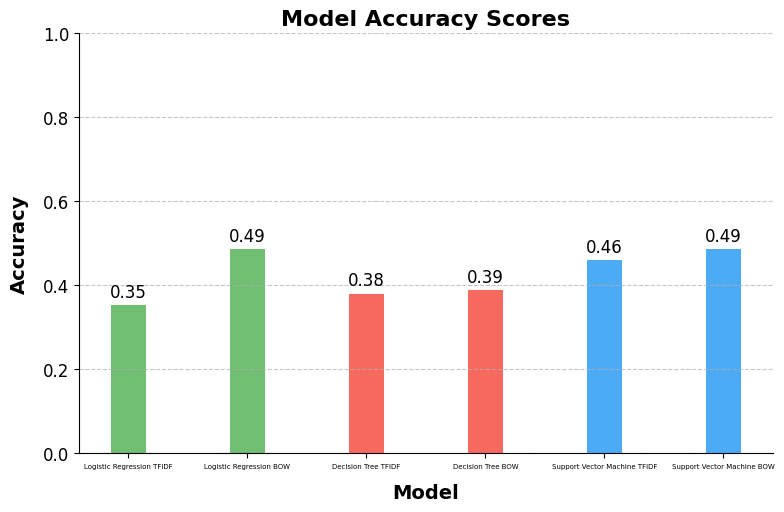

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# set the bar width and opacity
bar_width = 0.3
opacity = 0.8

# create a bar chart
models = ['Logistic Regression TFIDF','Logistic Regression BOW','Decision Tree TFIDF', 'Decision Tree BOW','Support Vector Machine TFIDF','Support Vector Machine BOW']
scores = [LRSCORE,LRSCORE_BOW, DTCSCORE, DTCSCORE_BOW,SVMSCORE,SVMSCORE_BOW]
colors = ['#4CAF50','#4CAF50', '#F44336','#F44336','#2196F3','#2196F3']  # specify colors for bars

fig, ax = plt.subplots(figsize=(8, 6))

rects = ax.bar(models, scores, bar_width,
                alpha=opacity,
                color=colors,
                edgecolor='none')

# add labels to the chart
plt.title('Model Accuracy Scores', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')

# add value labels to each bar
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

# adjust the plot limits
plt.ylim([0, 1.0])

# remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add a grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# customize the tick labels
ax.tick_params(axis='x', labelsize=5)
ax.tick_params(axis='y', labelsize=12)



# increase space between ticks and labels
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
plt.tight_layout()

# set the margins
plt.subplots_adjust(top=0.85, bottom=0.15)

# show the chart
plt.show()


AS WE CAN SEE BOW IS BETTER THAN TF-IDF IN ALL 3 MODELS AND SVM WITH BOW WAS OUR BEST MODEL

CLUSTERING

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import helper

# Import the Movies dataset
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [74]:
# Import the ratings dataset
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [75]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100836  ratings of  9742  movies.


Let's start by taking a subset of users, and seeing what their preferred genres are. We're hiding the most data preprocessing in helper functions so the focus is on the topic of clustering

In [76]:
genre_ratings = helper.get_genre_ratings(ratings, movies, ['Crime', 'Sci-Fi'], ['avg_crime_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_crime_rating,avg_scifi_rating
1,4.36,4.22
2,3.80,3.88
3,0.50,4.20
4,3.81,2.83
5,3.83,2.50


In [77]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  150


,index,avg_crime_rating,avg_scifi_rating
0,3,0.50,4.20
1,4,3.81,2.83
2,5,3.83,2.50
3,7,3.31,3.15
4,9,3.14,3.00


So we can see we have 183 users, and for each user we have their average rating of the romance and sci movies they've watched.

Let us plot this dataset

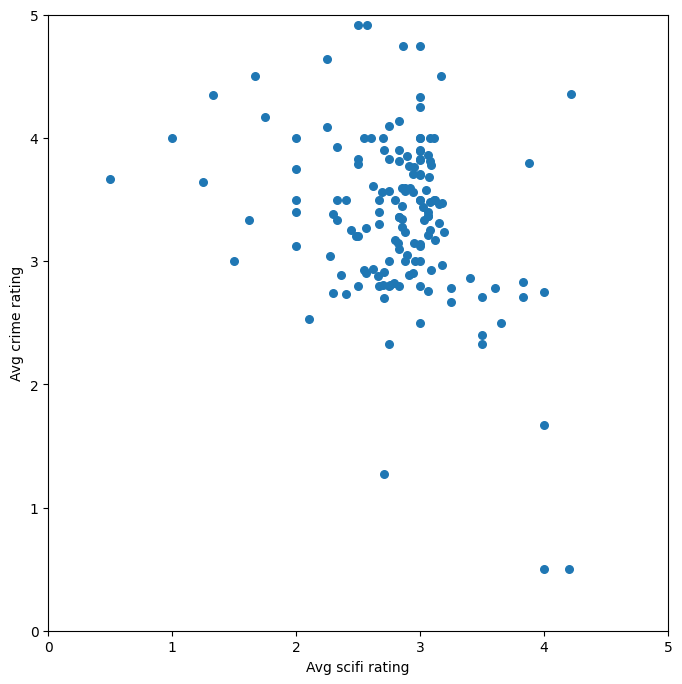

In [78]:
%matplotlib inline


helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_crime_rating'], 'Avg crime rating')

In [79]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_crime_rating']].values

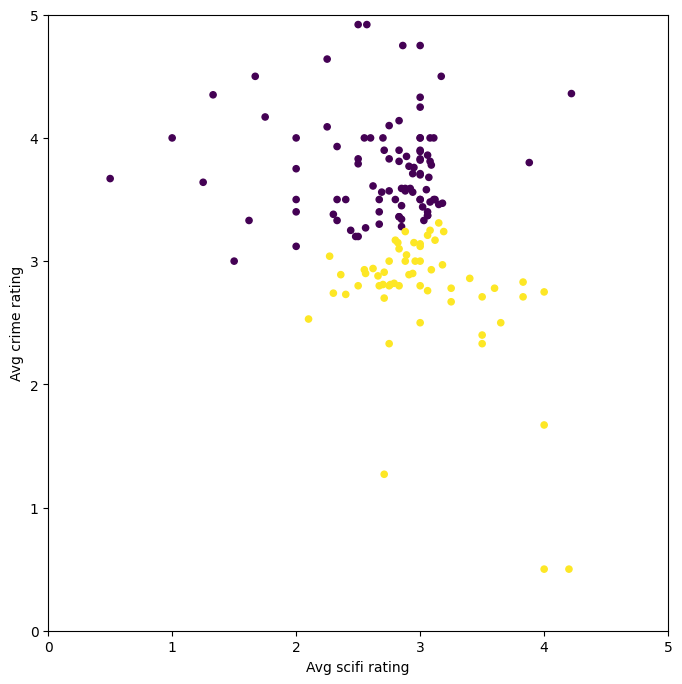

In [80]:
# TODO: Import KMeans
from sklearn.cluster import KMeans

# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)

# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions)

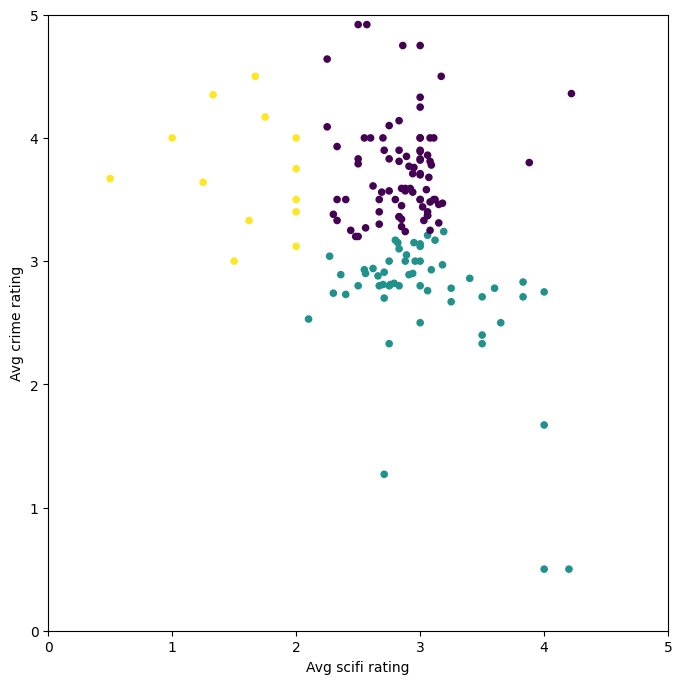

In [81]:
# TODO: Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)

# TODO: use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_2)

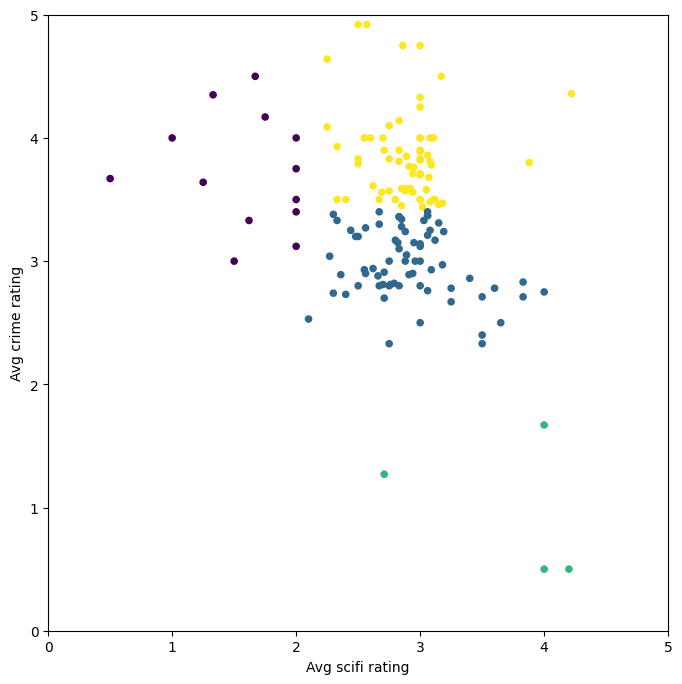

In [82]:
# TODO: Create an instance of KMeans to find three clusters
kmeans_3 = KMeans(n_clusters=4)

# TODO: use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_3)

In [83]:
df = biased_dataset[['avg_scifi_rating','avg_crime_rating']]

# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, len(X)+1, 5)

# Calculate error values for all k values we're interested in
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]

In [84]:
# Optional: Look at the values of K vs the silhouette score of running K-means with that value of k
list(zip(possible_k_values, errors_per_k))

[(2, 0.34619051395931283),
 (7, 0.3742852611160457),
 (12, 0.36933520340220205),
 (17, 0.3848488147081887),
 (22, 0.36687442735812614),
 (27, 0.36453899972706755),
 (32, 0.36674509839725733),
 (37, 0.3715924348872685),
 (42, 0.36568813343187057),
 (47, 0.3663652459312811),
 (52, 0.3886842034609577),
 (57, 0.3874319175666086),
 (62, 0.3710448101647873),
 (67, 0.37386770249468027),
 (72, 0.3943834791221409),
 (77, 0.37227176682214985),
 (82, 0.37497205360946567),
 (87, 0.35956792822902817),
 (92, 0.34364294062096434),
 (97, 0.3338249145639932),
 (102, 0.31481905220702167),
 (107, 0.2782593103031229),
 (112, 0.27964495206153367),
 (117, 0.24661943397640235),
 (122, 0.22291944413833414),
 (127, 0.19324260908277935),
 (132, 0.16523457381089396),
 (137, 0.1357892348211979),
 (142, 0.09721956696247375),
 (147, 0.05333333333333334)]

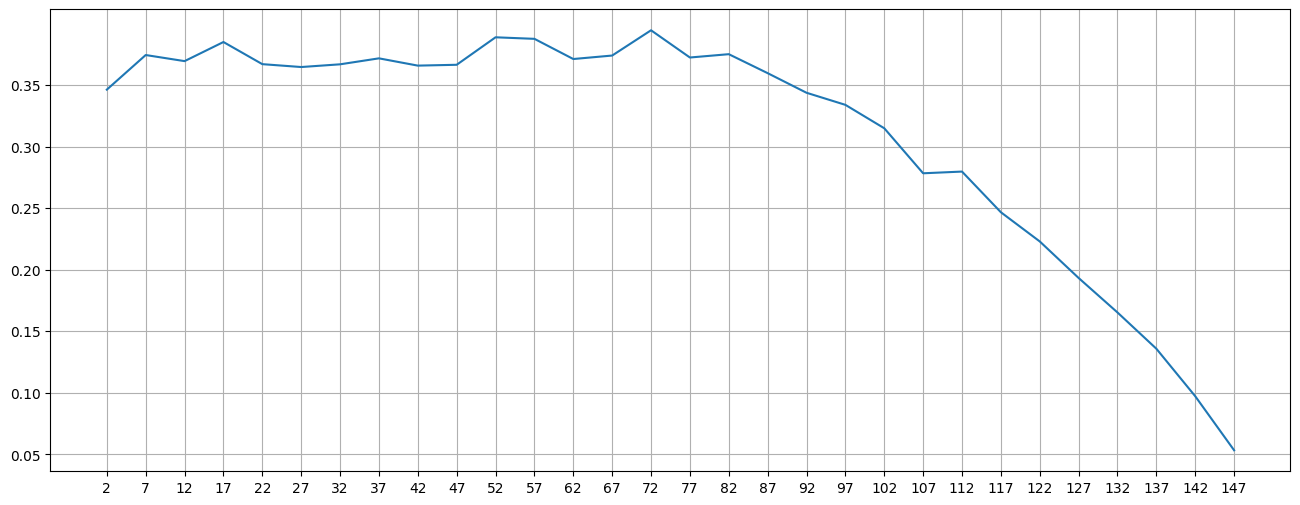

In [85]:
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

Looking at this graph, good choice for k is 7 as it will be easier to visualize, other good values are 27,57 and 77 which are difficult to visualize



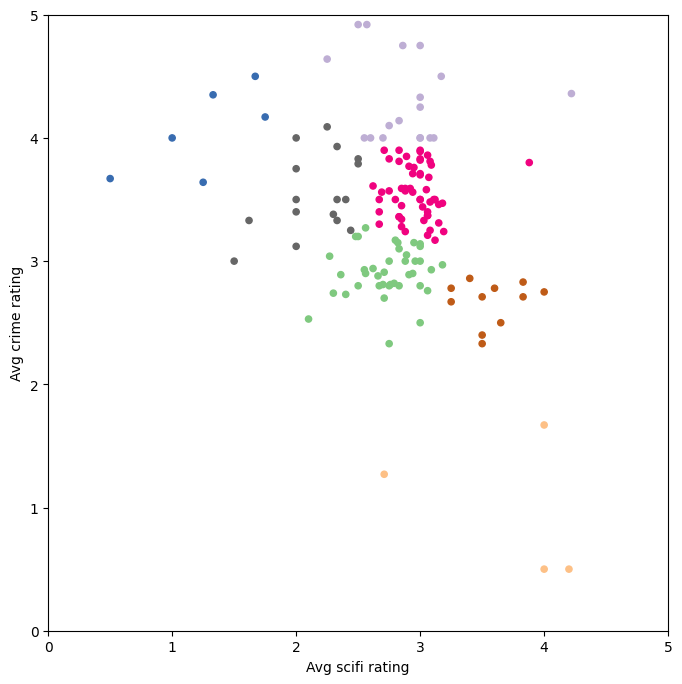

In [86]:
# TODO: Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=7)

# TODO: use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent')

So far, we've only been looking at how users rated romance and scifi movies. Let's throw another genre into the mix. Let's add the Action genre.

In [87]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies,
                                                     ['Crime', 'Sci-Fi', 'Action'],
                                                     ['avg_crime_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  150


,index,avg_crime_rating,avg_scifi_rating,avg_action_rating
0,3,0.50,4.20,3.57
1,4,3.81,2.83,3.32
2,5,3.83,2.50,3.11
3,7,3.31,3.15,3.26
4,9,3.14,3.00,3.12


In [88]:
X_with_action = biased_dataset_3_genres[['avg_scifi_rating','avg_crime_rating','avg_action_rating']].values

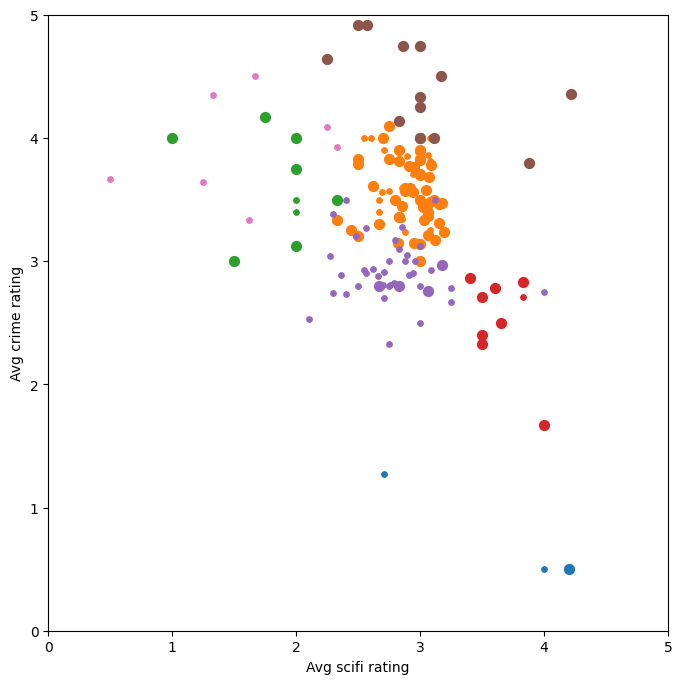

In [89]:
# TODO: Create an instance of KMeans to find seven clusters
kmeans_5 = KMeans(n_clusters=7)

# TODO: use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X_with_action)

# plot
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)

We used the x and y axes for scifi and romance respectively. We are using the size of the dot to roughly code the 'action' rating (large dot for avg ratings over than 3, small dot otherwise).